### **MARKET SEGMENTATION**


**`Market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics. In dividing or segmenting markets, researchers typically look for common characteristics such as shared needs, common interests, similar lifestyles or even similar demographic profiles. The overall aim of segmentation is to identify high yield segments – that is, those segments that are likely to be the most profitable or that have growth potential – so that these can be selected for special attention (i.e. become target markets).`**

---

`[Source: Wikipedia]`



## K-MEANS CLUSTERING

First a little introduction of the K-Means algorithm which I am going to implement here. The following process describes how this method is implemented.

1. k initial “means” are randomly generated within the data domain.

2. k clusters are created by associating every observation with the nearest mean.

3. The centroid of each of the k clusters becomes the new mean.

4. Steps 2 and 3 are repeated until convergence has been reached.


---


[Source: Wikipedia]

**I am looking to implement a K-Means clustering algorithm to a dataset from the trusted UCI Machine Learning Repository. The Wholesale Customers dataset consists of 8 attributes and 440 Instances.**

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customers Channel – Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8) REGION: customers Region Lisnon, Oporto or Other (Nominal)

Descriptive Statistics:

In [ ]:
wholeData <- read.csv("Wholesale customers data.csv")

In [ ]:
head(wholeData)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,3,12669,9656,7561,214,2674,1338
2,2,3,7057,9810,9568,1762,3293,1776
3,2,3,6353,8808,7684,2405,3516,7844
4,1,3,13265,1196,4221,6404,507,1788
5,2,3,22615,5410,7198,3915,1777,5185
6,2,3,9413,8259,5126,666,1795,1451


In [ ]:
summary(wholeData)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



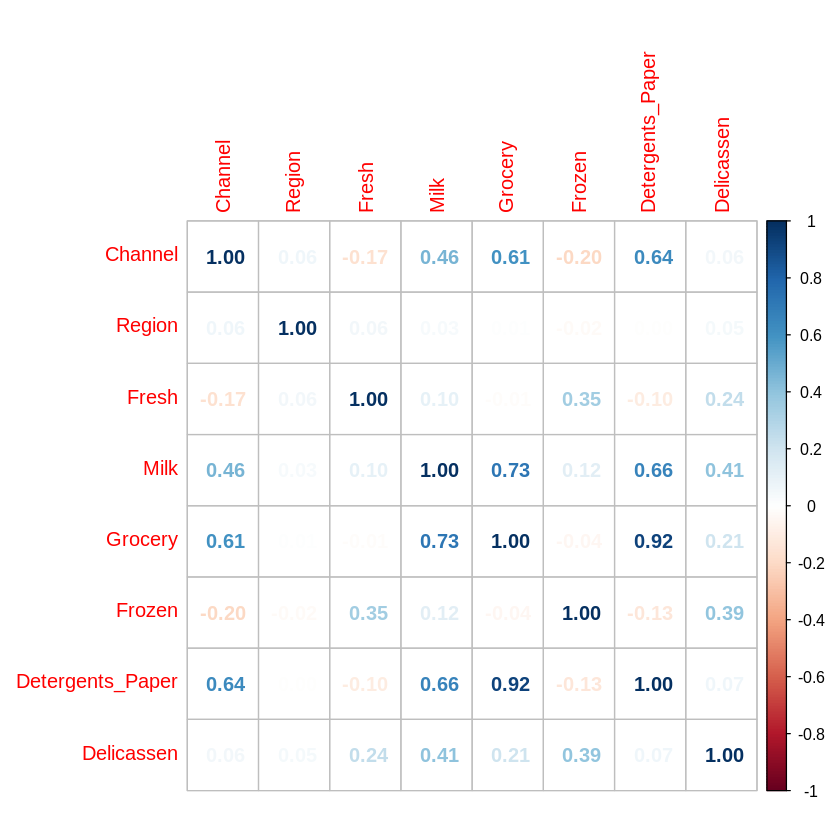

In [ ]:
#Identify strong correlations
w <- cor(wholeData)
corrplot(w, method="number")

From the above diagram we can see that there is strong correlation among the Detergents_Paper and Grocery.

Now we need to find the optimal number of cluster K. Determining the number of clusters in a data set, a quantity often labelled k as in the k-means algorithm, is a frequent problem in data clustering, and is a distinct issue from the process of actually solving the clustering problem.

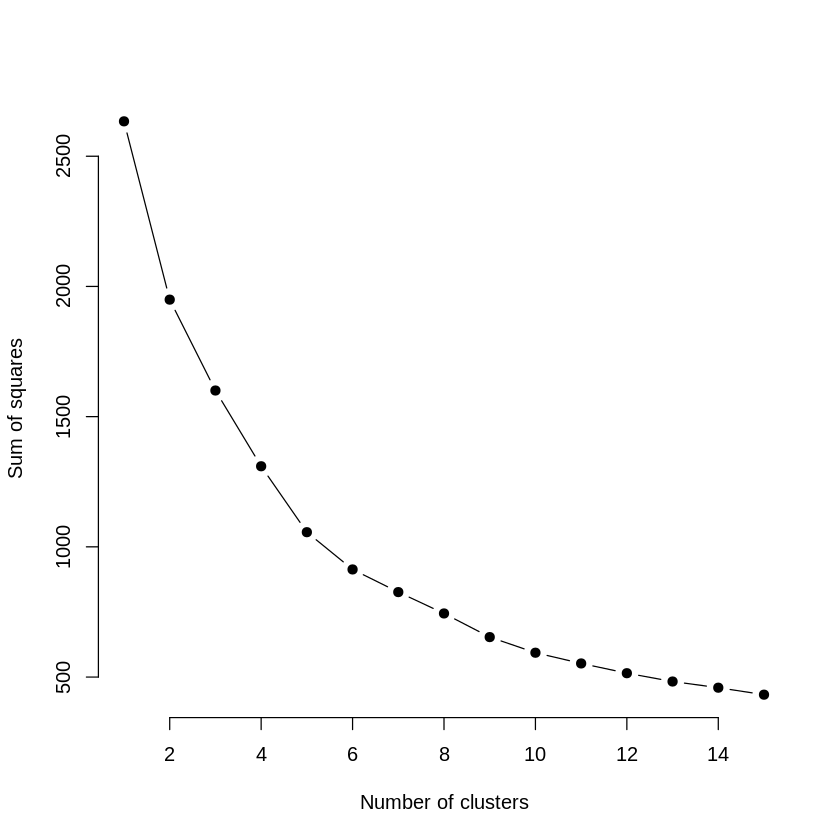

In [ ]:
set.seed(123)
k.max <- 15
data <- as.matrix(scale(wholeData[,(3:8)]))

wss <- sapply(1:k.max, 
 function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})

plot(1:k.max, wss,
 type="b", pch = 19, frame = FALSE, 
 xlab="Number of clusters",
 ylab="Sum of squares")

### **Trying to find out the best value of K using NbClust**

In [ ]:
install.packages("NbClust")
library(NbClust)
#Best number of cluster for the data
bestK <- NbClust(wholeData, min.nc=2, max.nc=5,index = "kl", method="kmeans")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
bestK

$All.index
     2      3      4      5 
0.7939 2.0648 1.1517 2.1721 

$Best.nc
Number_clusters     Value_Index 
         5.0000          2.1721 

$Best.partition
  [1] 3 3 3 3 5 3 3 3 3 4 4 3 5 5 5 3 4 3 5 3 5 3 5 2 5 5 3 5 4 1 5 3 5 5 3 3 5
 [38] 4 4 1 5 5 4 4 3 4 4 2 3 4 3 3 1 4 5 3 4 4 3 3 3 2 3 4 3 2 3 5 3 3 5 5 3 5
 [75] 3 5 3 4 3 3 3 4 4 5 3 2 2 1 3 5 3 3 2 5 4 3 3 3 3 3 4 4 3 1 5 5 4 4 3 4 3
[112] 4 5 5 5 3 3 3 5 3 5 3 3 3 1 1 5 5 3 1 3 3 5 3 3 3 3 3 3 3 5 5 1 3 5 4 3 3
[149] 3 5 5 3 5 3 3 4 4 5 3 4 3 3 5 4 3 4 3 3 3 3 4 4 3 4 3 4 1 3 3 3 3 1 4 2 3
[186] 3 3 3 4 4 5 3 3 4 3 5 5 3 3 3 4 4 5 3 3 4 3 3 3 4 5 2 3 3 4 4 4 5 4 3 5 3
[223] 3 3 3 3 5 3 3 3 3 3 5 3 5 3 3 5 3 1 5 5 5 3 3 4 3 3 5 3 3 4 3 5 3 5 3 3 1
[260] 1 3 3 5 3 4 4 4 5 4 5 3 3 3 1 3 3 5 3 3 5 3 3 1 5 1 1 3 5 5 1 3 3 3 4 5 3
[297] 5 3 3 3 5 4 3 4 4 4 4 5 3 4 3 5 4 3 3 4 3 3 3 4 3 3 5 3 5 1 3 3 5 3 3 4 5
[334] 2 5 5 3 3 3 3 3 3 3 4 3 3 4 5 3 4 3 4 3 4 5 3 5 4 3 3 5 3 3 3 3 3 3 3 5 3
[371] 1 5 3 5 3 3 4 1 3 3 5 5 5 3 4 3 3 5 3 3 3 3 3 5 3 3 4 3 3 3 3 5 5 5 5 3 5
[408] 4 3 3 3 3 3 3 3 3 4 3 4 3 4 5 5 5 5 3 4 5 3 3 4 3 5 3 5 5 1 4 3 3

### **Using silhouette method**

In [ ]:
install.packages("factoextra")
library(fviz_nbclust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



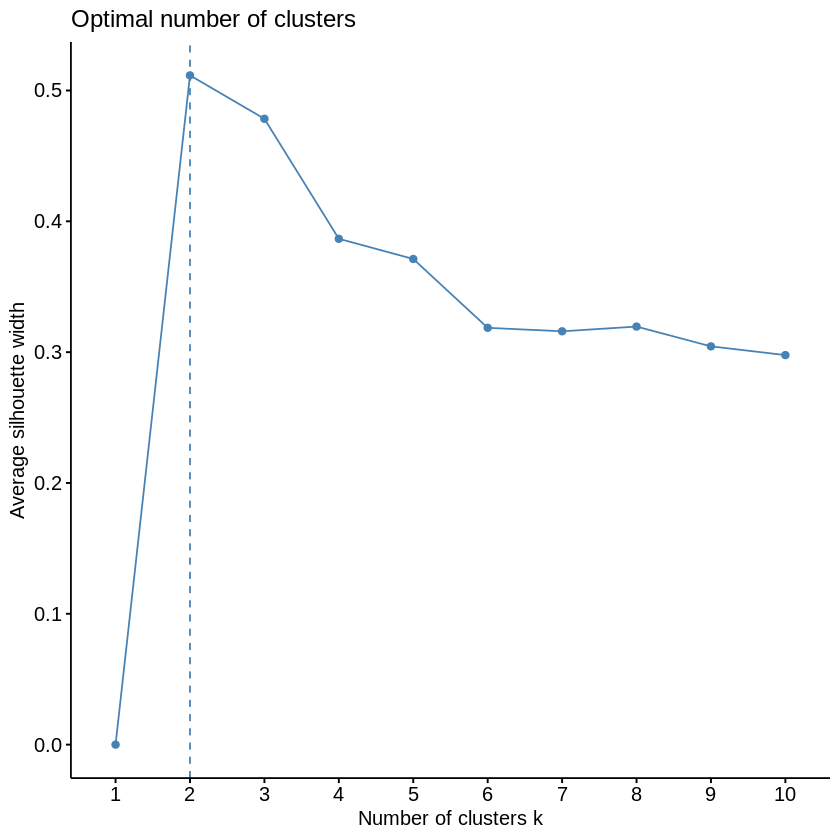

In [ ]:
fviz_nbclust(wholeData, kmeans, method='silhouette')

#**Using K as 2**

In [ ]:
kmm <- kmeans(wholeData[,(3:8)], 2)
kmm

K-means clustering with 2 clusters of sizes 375, 65

Cluster means:
      Fresh     Milk   Grocery   Frozen Detergents_Paper Delicassen
1  7944.112 5151.819  7536.128 2484.131         2872.557   1214.261
2 35401.369 9514.231 10346.369 6463.092         2933.046   3316.846

Clustering vector:
  [1] 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 1 1 2
 [38] 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1
[149] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1
[186] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2
[260] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2 2 2 1 1 1 2 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 

### **Clusters interpretation**

Cluster 1 – low spenders.

Cluster 2 – highest fresh spenders.

### **Using K as 3**

In [ ]:
kmm <- kmeans(wholeData[,(3:8)], 3)
kmm

K-means clustering with 3 clusters of sizes 50, 330, 60

Cluster means:
     Fresh      Milk   Grocery   Frozen Detergents_Paper Delicassen
1  8000.04 18511.420 27573.900 1996.680        12407.360   2252.020
2  8253.47  3824.603  5280.455 2572.661         1773.058   1137.497
3 35941.40  6044.450  6288.617 6713.967         1039.667   3049.467

Clustering vector:
  [1] 2 2 2 2 3 2 2 2 2 1 2 2 3 2 3 2 2 2 2 2 2 2 3 1 3 2 2 2 1 3 2 2 2 3 2 2 3
 [38] 2 1 3 3 2 2 1 2 1 1 1 2 1 2 2 3 2 3 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 1 1 3 2 3 2 2 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2
[112] 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 1 2 2
[149] 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 2 3 2 2 2 2 3 2 3 2
[186] 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 1 1 3 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 1 2 3 2 3 2 2 3
[260] 3 2 2 3 2 2 1 1 2 1 2 2 2 2 3 2 2 3 2 2 2 2 2 3 3 3 3 2 2 2 3 2 2 2 2 

### **Clusters interpretation**

Cluster 1 – highest milk, grocery, detergents_papers spenders.

Cluster 2 – low spenders.

Cluster 3 – highest fresh-products.

### **Using K as 5**

In [ ]:
kmm <- kmeans(wholeData[,(3:8)], 5)
kmm

K-means clustering with 5 clusters of sizes 10, 104, 80, 223, 23

Cluster means:
      Fresh      Milk   Grocery   Frozen Detergents_Paper Delicassen
1 21263.700 37443.300 46710.600 6287.200       21699.4000  8743.3000
2 21200.058  3886.423  5138.933 4119.856        1131.5192  1690.3365
3  4738.762 11609.013 18198.775 1515.388        8003.7750  1603.8000
4  6052.812  3266.314  4092.054 2459.682        1214.1300   990.6099
5 49296.087  4983.783  5590.304 8285.783         962.2609  2543.6957

Clustering vector:
  [1] 4 4 4 4 2 4 4 4 4 3 3 4 2 2 2 4 3 4 2 4 2 4 2 1 2 2 4 2 3 5 2 4 2 2 4 4 2
 [38] 3 3 5 2 2 3 3 4 3 3 1 4 3 4 4 5 3 2 4 3 3 4 4 4 1 4 3 4 1 4 2 4 4 2 2 4 2
 [75] 4 2 4 3 4 4 4 3 3 2 4 1 1 5 4 2 4 4 1 2 3 4 4 4 4 4 3 3 4 5 2 2 3 3 4 3 4
[112] 3 2 2 2 4 4 4 2 4 2 4 4 4 5 5 2 2 4 5 4 4 2 4 4 4 4 4 4 4 2 2 5 4 2 3 4 4
[149] 4 2 2 4 2 4 4 3 3 2 4 3 4 4 2 3 4 3 4 4 4 4 3 3 4 3 4 3 5 4 4 4 4 5 3 1 4
[186] 4 4 4 3 3 2 4 4 3 4 2 2 4 4 4 3 3 2 4 4 3 4 4 4 3 2 1 4 4 3 3 3 2 3 4 2 4
[223]

## **Clusters Interpretation**

Cluster 1 – mediocre Fresh, highest milk, Grocery, detergents_papers

Cluster 2 – mediocre spenders

Cluster 3 – highest Fresh spenders

Cluster 4 – low spenders

Cluster 5 – low spenders

The most base optimal number for quickly understanding the customer segmentation is when K=3 although other clusterings give detailed highlights and customer buying patterns.

